# **~ ~ ~ LENDING CLUB CASE STUDY ~ ~ ~**

# Import all the required libraries to complete the task.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import datetime as dt


In [4]:
# import the warning library to ignore the warnings to have smooth working of the seaborn library

import warnings
warnings.filterwarnings('ignore')

# 1. Uploading the Dataset 

In [6]:
loan_df = pd.read_csv('loan.csv')
loan_df.head()  # displaying the first 5 lines of the dataset, having the first look of the dataset

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# 2. Data Cleaning
## 1.1 To check if there is any headers/footers or summary details rows are there and delete it.

In [8]:
print(loan_df.shape)


(39717, 111)


In [9]:

#checking for the header or sub-section or the summary of the dataset if mentioned in the dataset
print('Top 3 lines of the dataset\n\n', loan_df.head(3),'\n')

#checking for the footer or summary of the dataset if mentioned in the dataset
print('Bottom 3 lines of the dataset \n\n',loan_df.tail(3))

Top 3 lines of the dataset

         id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0 

### From above analysis we can observe and confirm that there is neither any header, sub-heading and summary nor footers, Total, Subtotal rows are present in the dataset.
### Lets check the shape the loan dataframe.

In [11]:
loan_df.shape

# we found that there are 39717 rows and 111 columns

(39717, 111)

In [12]:
# see the different columns in the dataset to analyse the required and focused columns
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [13]:
# in the above command we have hidden columns so we will try to see all the columns for better view of data.

pd.set_option('display.max_columns', 111)
loan_df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [14]:
### to check if the no. of rows are same as length of df to see any missing / blank data at the end.
#To check if there is unnessasry rows or not.

total_rows = len(loan_df)
total_rows 

39717

## From the columns and case study criteria we can see that we have to focus on the customers' past data of loan status. Let's look into it.



In [16]:
loan_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

### The data to be focused is - Fully Paid and Charged_Off (DEFAULTERS)

In [18]:
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

### We have following categorical data available from the dataset
### - Fully Paid  -   32950 ; Charged Off  -   5627 ; Current     -    1140

In [20]:
# Dropping the rows for loan_status=='Current' as the loan currently in progress and cannot contribute to conclusive evidence if the customer will default of pay in future.
loan_df= loan_df[loan_df['loan_status'] != 'Current']
print("Total number of rows now:",len(loan_df)) ## Total no of rows now, remaining rows after deleting rows associated with "Current" as loan status.

Total number of rows now: 38577


In [21]:
rows_deleted=((total_rows- len(loan_df))*100)/total_rows
print("% of rows deleted:",round(rows_deleted,2)) # 2.87% rows were deleted in above used command

% of rows deleted: 2.87


In [22]:
# Check if there is any duplicate rows.
duplicate_rows = len(loan_df[loan_df.duplicated()])
print("Count of duplicate rows:",round(duplicate_rows,2)) # 0 duplicate rows found

Count of duplicate rows: 0



## 1.2 Delete the Un-neccessary Columns.


In [24]:
loan_df.shape # to get the new shape of data

(38577, 111)

In [25]:
# To Check the details of columns if the they are nulls or blanks as value.
loan_df.isnull().sum()*100/len(loan_df)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

#### we have found that tot_hi_cred_lim, total_bal_ex_mort, total_bc_limit, total_il_high_credit_limit are fully blank columns, thus are not of any use. we can drop them

In [27]:
print("Total columns with values NA: ", len(loan_df.columns[loan_df.isna().all()].tolist()))
na_columns=list(loan_df.columns[loan_df.isna().all()])
print("NA colums List:")
na_columns

Total columns with values NA:  55
NA colums List:


['next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_

#### -- We got 55 columns with values NA, thus we will be deleting all the columns listed in above command. ['next_pymnt_d',
 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt',  'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', total_il_high_credit_limit']

In [29]:
# Deleting the columns which is having all rows values as na.
loan_df = loan_df.dropna(axis=1, how="all")
print(loan_df.head())
print('Shape of the dataframe after droping NA Columns is:', loan_df.shape)

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
5  1075269    1311441       5000         5000           5000.0   36 months   

  int_rate  installment grade sub_grade             emp_title emp_length  \
0   10.65%       162.87     B        B2                   NaN  10+ years   
1   15.27%        59.83     C        C4                 Ryder   < 1 year   
2   15.96%        84.33     C        C5                   NaN  10+ years   
3   13.49%       339.31     C        C1   AIR RESOURCES BOARD  10+ years   
5    7.90%       156.46     A        A4  Veolia Transportaton    3 years   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0

##### -- The revised Shape of the dataframe after droping NA Columns is : (38577, 56)

In [31]:
# Deleting the rows which is having all rows values as na.
loan_df = loan_df.dropna(axis=0, how="all")
print(loan_df.head())
print('Shape of the dataframe after droping NA Rows is :', loan_df.shape)

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
5  1075269    1311441       5000         5000           5000.0   36 months   

  int_rate  installment grade sub_grade             emp_title emp_length  \
0   10.65%       162.87     B        B2                   NaN  10+ years   
1   15.27%        59.83     C        C4                 Ryder   < 1 year   
2   15.96%        84.33     C        C5                   NaN  10+ years   
3   13.49%       339.31     C        C1   AIR RESOURCES BOARD  10+ years   
5    7.90%       156.46     A        A4  Veolia Transportaton    3 years   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0

##### -- The revised Shape of the dataframe after droping NA Rows is : (38577, 56) i.e unchanged.. there is no Rows with NA value

In [33]:
# Let's delete all the columns whose value is 'unique' in nature.

unique_columns = [col for col in loan_df.columns if loan_df[col].nunique() == len(loan_df)]
unique_columns

['id', 'member_id', 'url']

#### -- the columns whose value is 'uniqe' in nature - ['id', 'member_id', 'url']

In [35]:
# We will delete'member_id', and 'url' as it doesn't count in EDA. Will keep the id columns which will be bused for creating piviot table
loan_df.drop(['url','member_id'],axis=1, inplace=True)

In [36]:
#new shape of the DF - (38577, 54)
loan_df.shape

(38577, 54)

#### -- Lets delete the column which is having text/description values as they don't contribute to EDA. we will be left with 52 columns now


In [38]:
loan_df.drop(columns=['desc','title'],inplace=True)
loan_df.shape

(38577, 52)

In [39]:
# Let's limit our analysis till Group level only. Hence deleting the subgroups.
loan_df = loan_df.drop(['sub_grade'],  axis=1)

In [40]:
#Behavioural data is captured post loan approval and will not be available during the loan approval process. Hence removing these fields.
behavioural_cols=['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                          'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'application_type','last_pymnt_d','last_credit_pull_d']

loan_df=loan_df.drop(behavioural_cols,axis=1)

In [41]:
# Let's try to find the number of unique values in each column and will delete if any column have lesser unique values 
loan_df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
addr_state                       50
issue_d                          55
mths_since_last_delinq           95
mths_since_last_record          111
int_rate                        370
zip_code                        822
loan_amnt                       870
funded_amnt                    1019
dti                            2853
annual_inc                     5215
funded_amnt_inv                8050
installment                 

In [42]:
# list out  the columns with 1 unique value

for column in loan_df.columns:
    if loan_df[column].nunique(dropna=True) == 1:
        print(column)
        loan_df = loan_df.drop(column, axis=1)
print("-------------")
loan_df

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens
-------------


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,NaN,NaN,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,NaN,NaN,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,NaN,NaN,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,35.0,NaN,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,0.0,0.0,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,5.0,0.0,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,0.0,0.0,NaN
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,0.0,0.0,NaN


#### -- after droping these columns the df shape is 38577 rows × 22 columns

In [44]:
# Dropping the columns which is having more than 50% of value is null.
total_rows = len(loan_df)
for column in loan_df.columns:
    if loan_df[column].isna().mean().round(2) >= 0.50:
        print(column)
        loan_df = loan_df.drop(column, axis=1)
loan_df.shape

mths_since_last_delinq
mths_since_last_record


(38577, 20)

In [45]:
pd.set_option('display.max_columns',None)
loan_df.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0


In [46]:
# Deleting emp_title as its description or textual informations and doesn't participate in EDA analysis.
loan_df = loan_df.drop(['emp_title'], axis=1)

# 2. Data Conversion

In [48]:
loan_df.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [49]:
loan_df.shape

(38577, 19)

#### Let's explore and understand what's inside these columns and convert the datatype if required... eg. we can see term is an object, why? it should be an interger or float. same case wioth interest rate - it should be float nt object.


In [51]:
# Exploring column 'term'
loan_df['term'].value_counts()

term
36 months    29096
60 months     9481
Name: count, dtype: int64

#### It includes the months with the month number as int. We can remove months from the term to get an int value

In [53]:
def cleaned_term(term):
    return int(term.strip().split()[0])

loan_df['term'] = loan_df['term'].apply(cleaned_term) # removing the string part (months) of int value
loan_df['term'].dtype

dtype('int64')

In [54]:
#checking term
loan_df['term'].value_counts()

term
36    29096
60     9481
Name: count, dtype: int64

In [55]:
# Exploring column 'int_rate'
loan_df['int_rate'].value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [56]:
# Convert int_rate from string to float by removing % sign.
loan_df['int_rate']=loan_df['int_rate'].str.strip('%').astype(float)
loan_df['int_rate'].head(2)

0    10.65
1    15.27
Name: int_rate, dtype: float64

In [57]:
loan_df['int_rate'].value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64

In [58]:
loan_df.loan_amnt.value_counts()

loan_amnt
10000    2809
12000    2248
5000     2028
6000     1886
15000    1838
         ... 
18325       1
9650        1
20450       1
15425       1
22550       1
Name: count, Length: 870, dtype: int64

In [59]:
loan_df.funded_amnt.value_counts()

funded_amnt
10000    2719
12000    2161
5000     2017
6000     1876
15000    1732
         ... 
1650        1
30100       1
19675       1
21275       1
22350       1
Name: count, Length: 1019, dtype: int64

In [60]:
# Convert the column loan_amnt and funded_amnt from int to flot64
loan_df = loan_df.astype({'loan_amnt':'float','funded_amnt':'float'})
loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0


In [61]:
# check the grade datatype.
loan_df['grade'].value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

In [62]:
loan_df['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [63]:
# Rounding off the belows to two decimals points.
for c in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    loan_df[c] = loan_df[c].apply(lambda x: round(x,2))
    print(loan_df[c])

0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: loan_amnt, Length: 38577, dtype: float64
0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: funded_amnt, Length: 38577, dtype: float64
0         4975.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     1075.0
39713      875.0
39714     1325.0
39715      650.0
39716      800.0
Name: funded_amnt_inv, Length: 38577, dtype: float64
0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64
0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
    

In [64]:
#converting issue_d (Dec-11) to date type (2011-12-01)
loan_df['issue_d'] = pd.to_datetime(loan_df.issue_d, format='%b-%y')
loan_df['issue_d']



0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

### -- checking of the NULL values in the remaining columns

In [66]:
(loan_df.isnull().sum()*100)/len(loan_df)

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

# 3. Dropping/ Imputing the rows.


In [68]:
# Dropping the null rows for emp_length and pub_rec_bankruptcies columns as number of null rows are very less.
prev_rows=len(loan_df)
prev_rows

38577

In [69]:
loan_df= loan_df[loan_df['emp_length'].notna()]
loan_df= loan_df[loan_df['pub_rec_bankruptcies'].notna()]

In [70]:
after_rows=len(loan_df)
total_deleted=((prev_rows-after_rows)*100)/prev_rows
print("Total % of rows deleted:",round(total_deleted,2))
print(loan_df.shape)

Total % of rows deleted: 4.48
(36847, 19)


### -- FINAL check for NA and Null values

In [72]:
(loan_df.isnull().sum()*100)/len(loan_df) 

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [73]:
# Removing symbols and string from the emp_lenth column to get the integer value
def emp_length_strip(x):
  x=x.strip("years")
  x=x.strip("<")
  x=x.replace(" ", "")
  x=x.replace("+", "")
  return x

loan_df['emp_length']=loan_df['emp_length'].apply(lambda x : emp_length_strip(x) )

In [74]:
print(loan_df['emp_length'])

0        10
1         1
2        10
3        10
5         3
         ..
39562     1
39573     3
39623     8
39666     2
39680     2
Name: emp_length, Length: 36847, dtype: object



# 4. Derived Columns


In [76]:
# Creating a dervied columns for issue month and issue year from issues date
loan_df['issue_year']=pd.DatetimeIndex(loan_df['issue_d']).year
loan_df['issue_month']=pd.DatetimeIndex(loan_df['issue_d']).month

(36847, 21)
count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


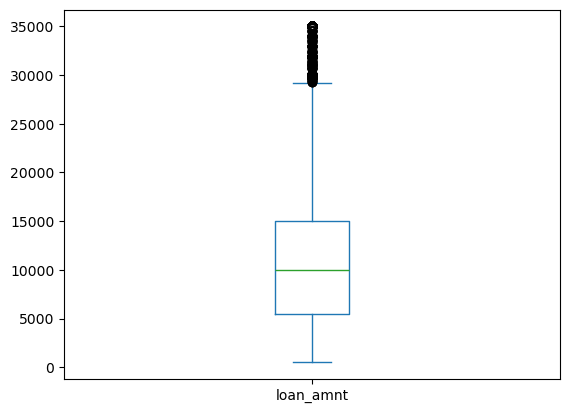

In [77]:
print(loan_df.shape)
print(loan_df["loan_amnt"].describe())
loan_df['loan_amnt'].plot(kind='box')
plt.show()


# 5. Univariate Analysis


In [79]:
# Column metadata used by functions below
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annual Income',
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}

## Bucketing different varaibles for better analysis

In [81]:
# Bucketting Loan Amount
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'
    else:
        return '15K - above' # 75% quartile

loan_df['loan_amnt_b'] = loan_df.apply(lambda x : bucket_loan_amnt(x['loan_amnt']), axis = 1)

In [82]:
#Bucketing Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

loan_df['annual_inc_b'] = loan_df.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

In [83]:
# Bucketing interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan_df['int_rate_b'] = loan_df.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

In [84]:
# Bucketing dti
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan_df['dti_b'] = loan_df.apply(lambda x : bucket_dti(x.dti), axis = 1)

In [85]:
# Univarients function
def plot_digram(df, column):
    fig, p = plt.subplots(1,2, figsize=(16, 4))
    sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sea.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plt.tight_layout()
    plt.show()

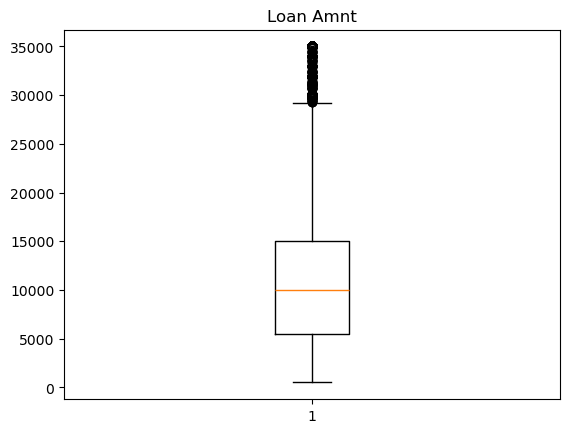

In [86]:
plt.boxplot(loan_df['loan_amnt'])
plt.title('Loan Amnt')
plt.show()

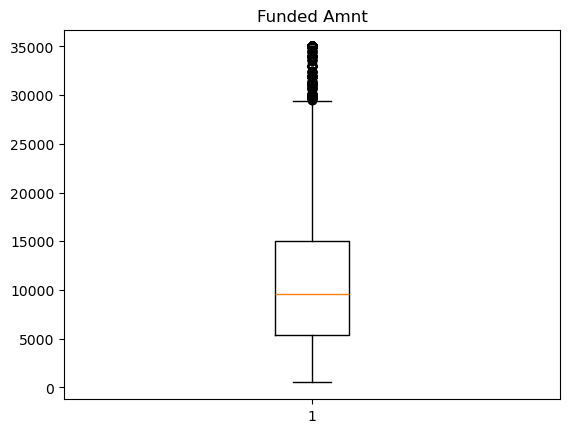

In [87]:
plt.boxplot(loan_df['funded_amnt'])
plt.title('Funded Amnt')
plt.show()

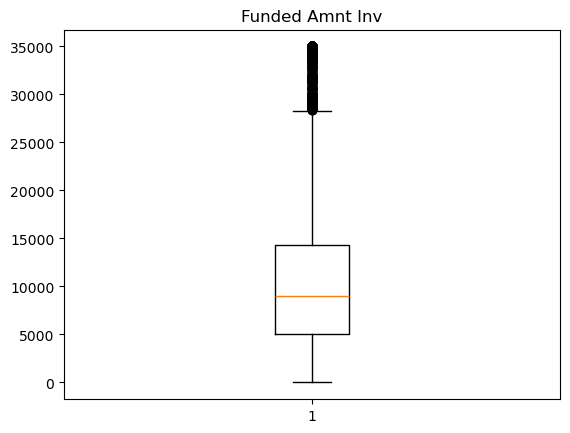

In [88]:
plt.boxplot(loan_df['funded_amnt_inv'])
plt.title('Funded Amnt Inv')
plt.show()

max annual income is : 6000000.0


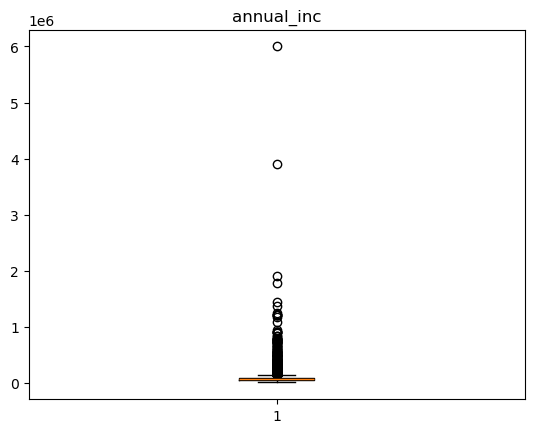

In [89]:
print('max annual income is :', loan_df['annual_inc'].max())

plt.boxplot(loan_df['annual_inc'])
plt.title('annual_inc')
plt.show()

In [90]:
# we can see the there are outlier in the annual income column

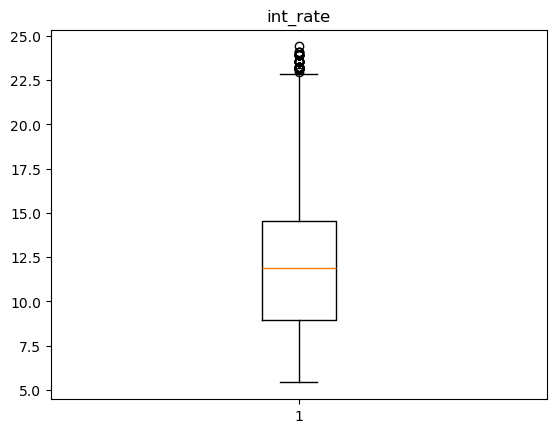

In [91]:
plt.boxplot(loan_df['int_rate'])
plt.title('int_rate')
plt.show()

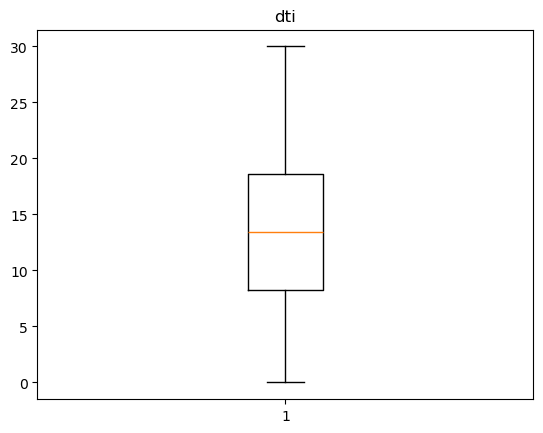

In [92]:
plt.boxplot(loan_df['dti'])
plt.title('dti')
plt.show()

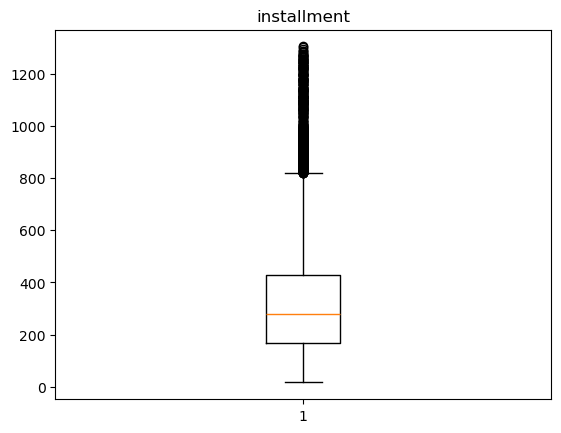

In [93]:
plt.boxplot(loan_df['installment'])
plt.title('installment')
plt.show()

### -- From above box plots we can see that there are many outliers exist for columns 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc'.
#### -- Let's remove the outlier and revalidate the box plot

In [95]:

outliers_columns_set1= ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
outliers_columns_set2=['int_rate', 'installment', 'annual_inc']
# Define a function to remove outliers based on IQR
def remove_outliers_iqr(data, columns,threshold):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Remove outliers from the DataFrame
loan_df =remove_outliers_iqr(loan_df, outliers_columns_set1,1.5)
loan_df =remove_outliers_iqr(loan_df, outliers_columns_set2,1.5)

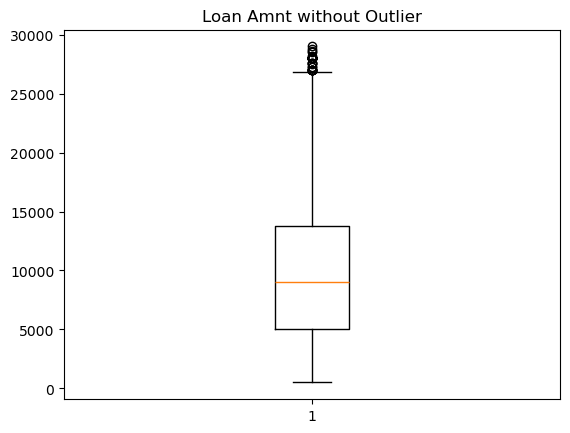

In [96]:
plt.boxplot(loan_df['loan_amnt'])
plt.title('Loan Amnt without Outlier')
plt.show()


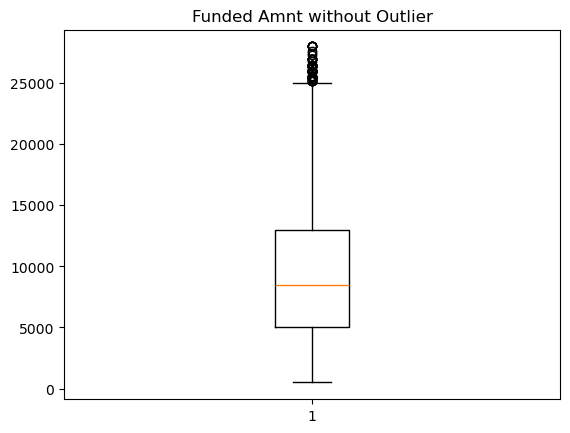

In [97]:
plt.boxplot(loan_df['funded_amnt'])
plt.title('Funded Amnt without Outlier')
plt.show()


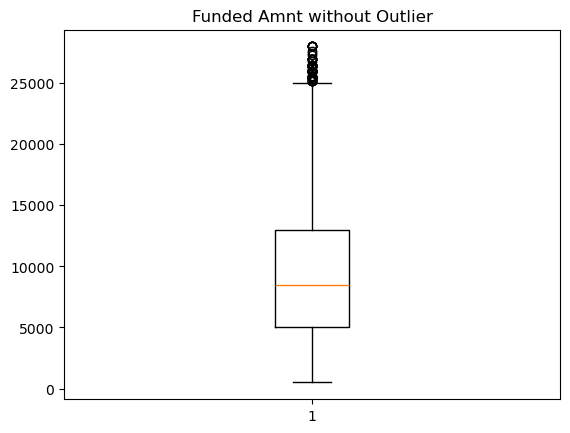

In [98]:
plt.boxplot(loan_df['funded_amnt'])
plt.title('Funded Amnt without Outlier')
plt.show()

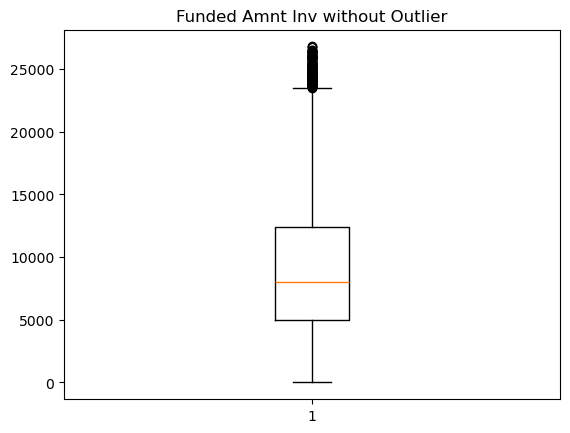

In [99]:
plt.boxplot(loan_df['funded_amnt_inv'])
plt.title('Funded Amnt Inv without Outlier')
plt.show()

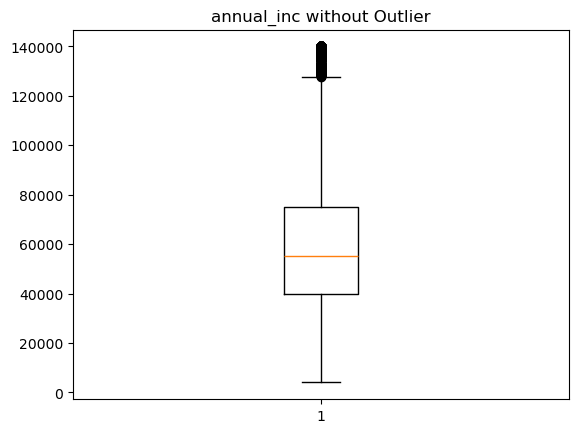

In [100]:
plt.boxplot(loan_df['annual_inc'])
plt.title('annual_inc without Outlier')
plt.show()

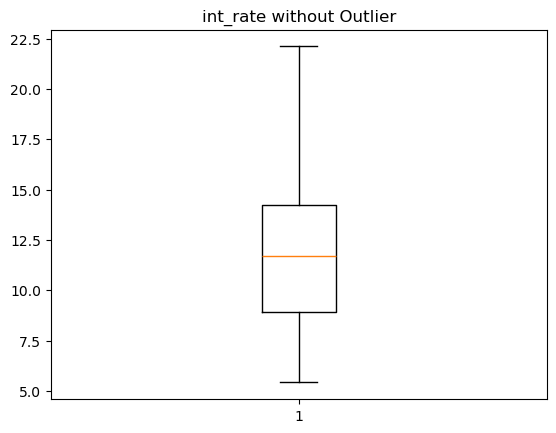

In [101]:
plt.boxplot(loan_df['int_rate'])
plt.title('int_rate without Outlier')
plt.show()

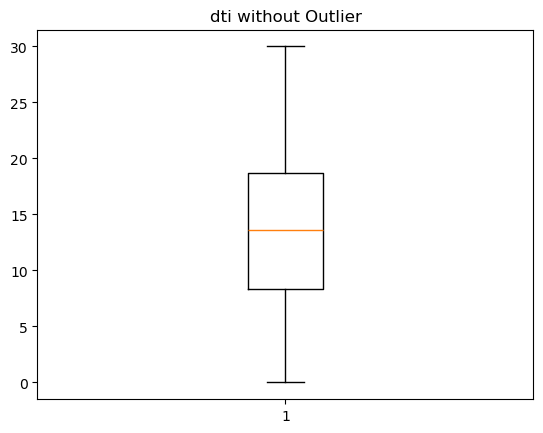

In [102]:
plt.boxplot(loan_df['dti'])
plt.title('dti without Outlier')
plt.show()

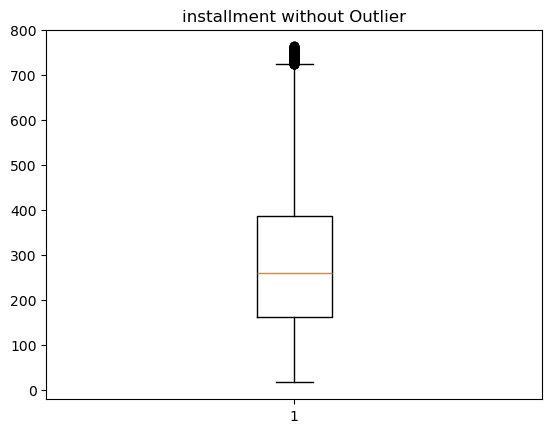

In [103]:
plt.boxplot(loan_df['installment'])
plt.title('installment without Outlier')
plt.show()

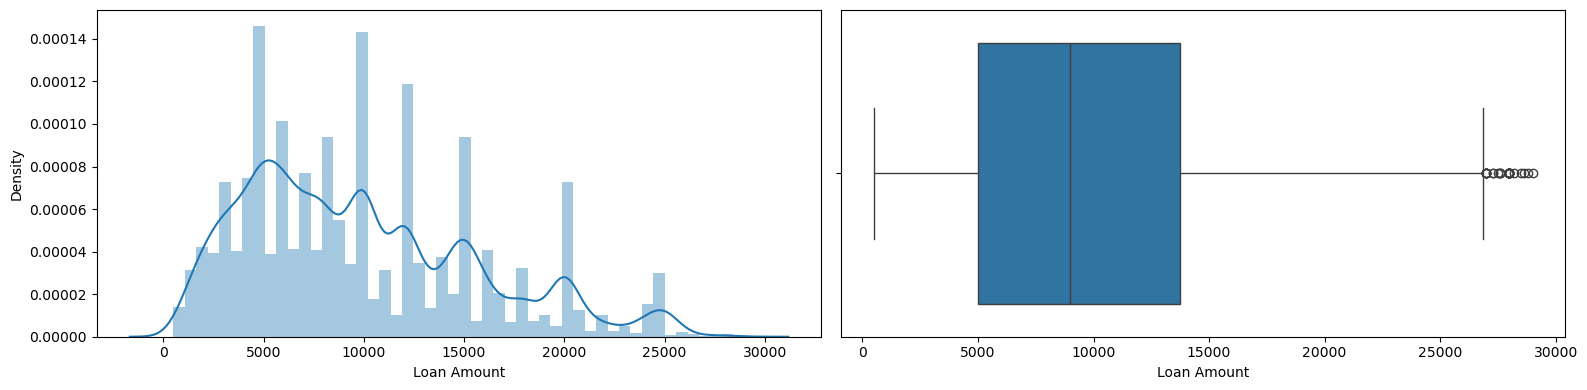

count    33191.000000
mean      9820.838480
std       5809.600807
min        500.000000
25%       5000.000000
50%       9000.000000
75%      13750.000000
max      29000.000000
Name: loan_amnt, dtype: float64


In [104]:
plot_digram(loan_df, 'loan_amnt')
# describe the Loan Amount
print(loan_df['loan_amnt'].describe())
plt.show()

### Observation of Loan Amount:
#### Most of the loan amount applied was in the range of 5k-14k.
#### Max Loan amount applied was ~29k.

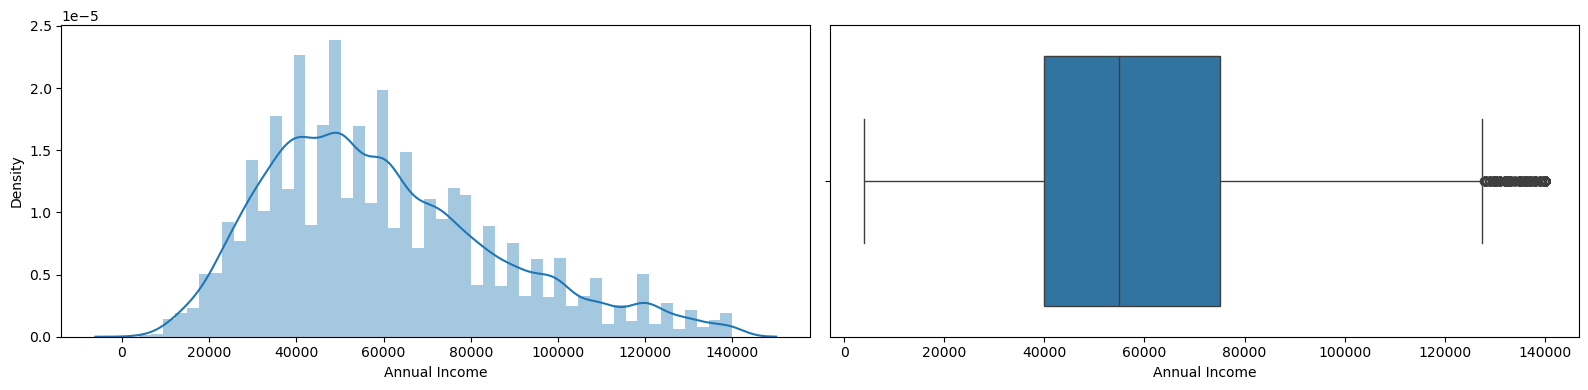

count     33191.000000
mean      59883.284700
std       26916.857415
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64


In [106]:
plot_digram(loan_df, 'annual_inc')
# describe the annual income details
print(loan_df['annual_inc'].describe())
plt.show()


In [107]:
# The Annual income of most if applicants lies between 40k-75k.
print("Average Annual Income is :", round(loan_df['annual_inc'].median(),2))

Average Annual Income is : 55000.0


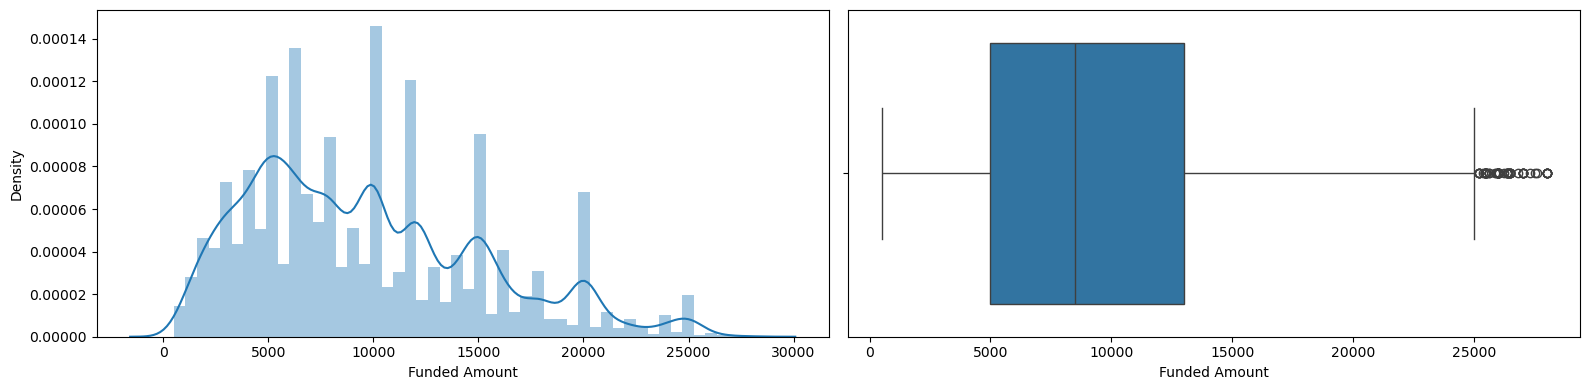

count    33191.000000
mean      9593.825887
std       5565.574327
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13000.000000
max      28000.000000
Name: funded_amnt, dtype: float64
Average Funded Amount is : 8500.0


In [108]:
plot_digram(loan_df, 'funded_amnt')
print(loan_df['funded_amnt'].describe())
plt.show()
print("Average Funded Amount is :", round(loan_df['funded_amnt'].median(),2))

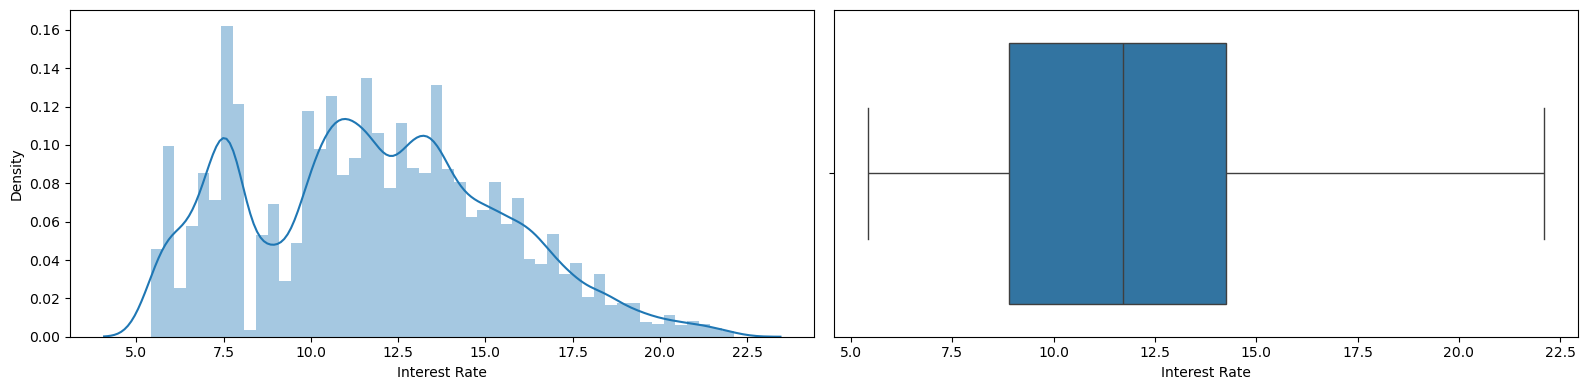

count    33191.000000
mean        11.782783
std          3.591944
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64


In [109]:
plot_digram(loan_df, 'int_rate')
print(loan_df['int_rate'].describe())
plt.show()

### Observation of Rate of Interest -
#### Most of the applicant's rate of interesrt is between in the range of 8%-14%.
#### Average Rate of interest of rate is 11.58%


## 5.2 Unordered Categorical Variable Analysis


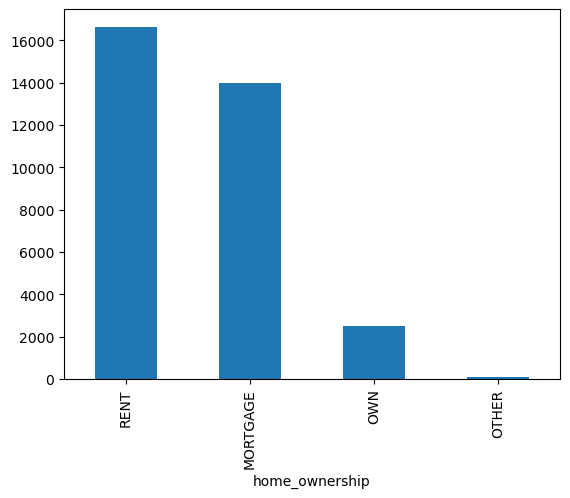

home_ownership
RENT        16644
MORTGAGE    13982
OWN          2476
OTHER          89
Name: count, dtype: int64


In [112]:
loan_df['home_ownership'].value_counts().plot.bar()
plt.show()
print(loan_df['home_ownership'].value_counts())

### from the above graph of "home_ownership" we have observed that - 
#### - majority of loan applicants are either 'living on Rent' or 'on Mortgage'.
#### - These applicants as per the Case study definition fall under the risky category.

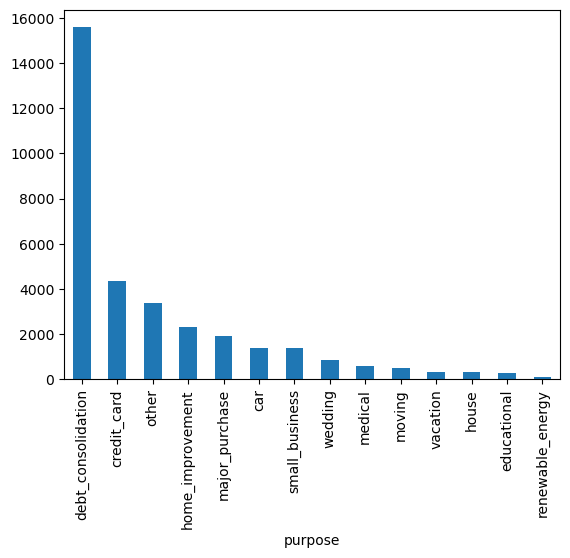

In [114]:
loan_df['purpose'].value_counts().plot.bar()
plt.show()

### From above graph, it is understood that the purpose of most of the loan applicants are for debt_consolidations.

In [116]:
Failed_per_houseowner_ship=loan_df
Failed_per_houseowner_ship["loan_status"].value_counts()

loan_status
Fully Paid     28477
Charged Off     4714
Name: count, dtype: int64

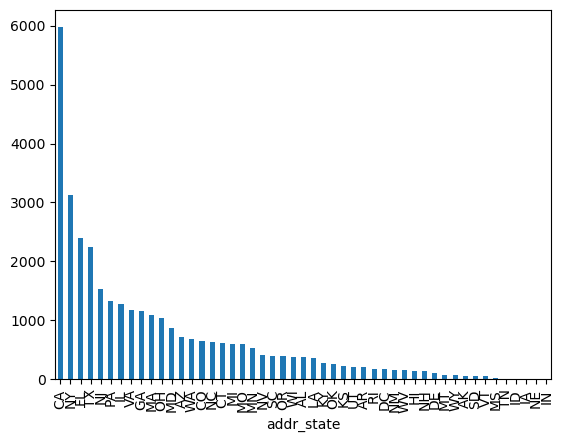

addr_state
CA    5971
NY    3134
FL    2404
TX    2246
NJ    1531
Name: count, dtype: int64


In [117]:
#using Pie plot to visualize
loan_df['addr_state'].value_counts().plot(kind="bar")
plt.show()
print(loan_df['addr_state'].value_counts().head(5))

### From the above graph, it is understood that most of the applications are from 'CA' state
#### -  the substaintial applications are from 3 states - CA, NY and FL

### 5.3 Ordered Categorical Variable Analysis

emp_length
10    7149
1     6883
2     3882
3     3615
4     3012
5     2864
6     1937
7     1532
8     1236
9     1081
Name: count, dtype: int64


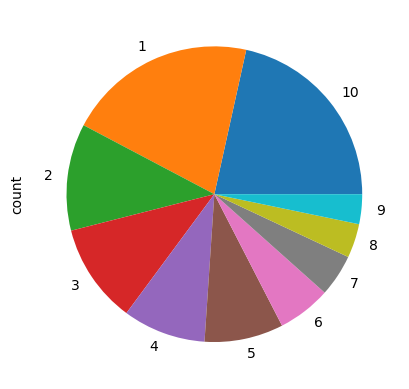

In [120]:
print(loan_df['emp_length'].value_counts())
loan_df['emp_length'].value_counts().plot(kind="pie")
plt.show()

### From the above graph, it is understood that most of the applications are having 10+ Years of experience.

## 6.  Bivariate Analysis

In [123]:
#Bivariate Analysis on annual income against Chargedoff_Proportion -
inc_range_vs_loan = loan_df.groupby(['annual_inc_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off']+ inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0 - 40k,1570,7326,8896,0.176484
2,50k to 60k,788,4435,5223,0.150871
1,40k - 50k,807,4593,5400,0.149444
3,60k to 70k,486,3261,3747,0.129704
4,70k to 80k,385,2749,3134,0.122846
5,80k - above,678,6113,6791,0.099838


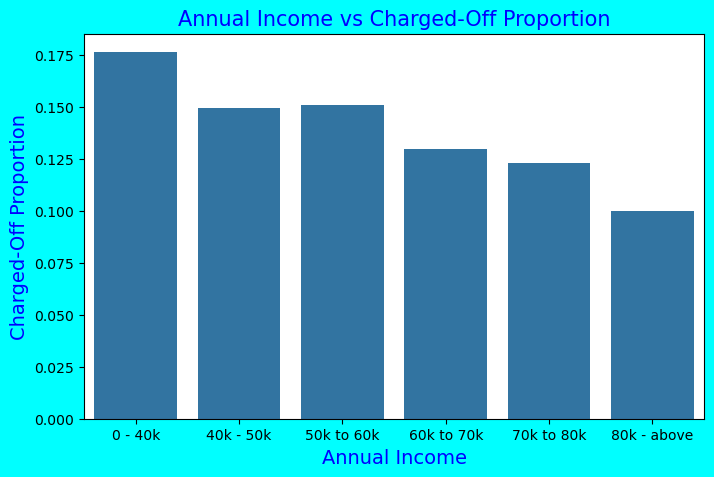

In [124]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(8, 5),facecolor = 'aqua')
ax1.set_title('Annual Income vs Charged-Off Proportion',fontsize=15,color = 'b')
ax1 = sea.barplot(x='annual_inc_b', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Charged-Off Proportion',fontsize=14,color = 'b')
ax1.set_xlabel('Annual Income',fontsize=14,color='b')
plt.show()
# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased.

In [125]:
#Bivariate Analysis on Intrest rate  against Chargedoff_Proportion -

interest_vs_loan = loan_df.groupby(['int_rate_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off']+ interest_vs_loan['Fully Paid']
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,int_rate_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1670,4751,6421,0.260084
0,High,985,4851,5836,0.168780
2,Moderate,961,5638,6599,0.145628
1,Low,579,4983,5562,0.104099
4,Very Low,519,8254,8773,0.059159


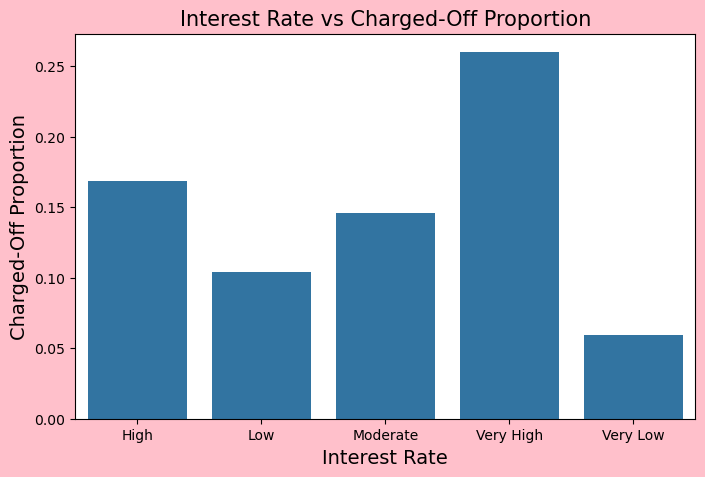

In [126]:
## plot the diagram.
fig, ax1 = plt.subplots(figsize=(8,5),facecolor='pink')
ax1.set_title('Interest Rate vs Charged-Off Proportion',fontsize=15,color='black')
ax1 = sea.barplot(x='int_rate_b', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='black')
ax1.set_ylabel('Charged-Off Proportion',fontsize=14,color = 'black')
plt.show()



### **Observations**:
#### - interest rate less than 10% or very low has very less chances of charged off. Intrest rates are starting from minimin 5 %.
#### - interest rate more than 16% or very high has good chnaces of charged off as compared to other category intrest rates.
#### - Charged off proportion is increasing with higher intrest rates.

#### Another inference form the houseowner variable those who are not owning the house are most likely to be charged off.

In [129]:
#Bivariate Analysis of Home Ownership against Chargedoff_Proportion -
home_ownership_vs_loan = loan_df.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off']+ home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,OTHER,16,73,89,0.179775
3,RENT,2488,14156,16644,0.149483
2,OWN,355,2121,2476,0.143376
0,MORTGAGE,1855,12127,13982,0.132671


In [130]:
#Bivariate Analysis of Home Ownership against Chargedoff_Proportion -
home_ownership_vs_loan = loan_df.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off']+ home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,OTHER,16,73,89,0.179775
3,RENT,2488,14156,16644,0.149483
2,OWN,355,2121,2476,0.143376
0,MORTGAGE,1855,12127,13982,0.132671


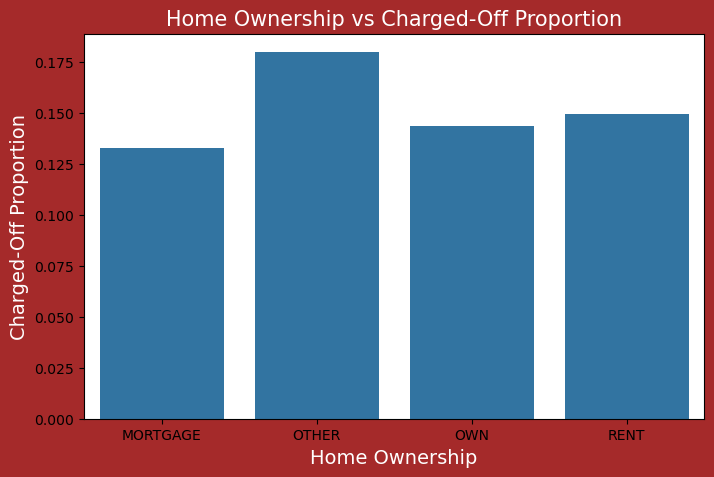

In [131]:

fig, ax1 = plt.subplots(figsize=(8,5),facecolor='brown')
ax1.set_title('Home Ownership vs Charged-Off Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='home_ownership', y='Chargedoff_Proportion', data=home_ownership_vs_loan)
ax1.set_xlabel('Home Ownership',fontsize=14,color='w')
ax1.set_ylabel('Charged-Off Proportion',fontsize=14,color = 'w')
plt.show()

### Observation:
#### Those who are not owning the home is having high chances of loan defaults.

In [133]:
#Bivariate Analysis on Purpose of loan against Chargedoff_Proportion -

purpose_vs_loan = loan_df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off']+ purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,366,1003,1369,0.267348
10,renewable_energy,16,67,83,0.192771
5,house,49,249,298,0.164430
3,educational,46,235,281,0.163701
9,other,531,2823,3354,0.158318
7,medical,95,510,605,0.157025
8,moving,79,433,512,0.154297
2,debt_consolidation,2329,13253,15582,0.149467
12,vacation,49,281,330,0.148485
4,home_improvement,277,2026,2303,0.120278


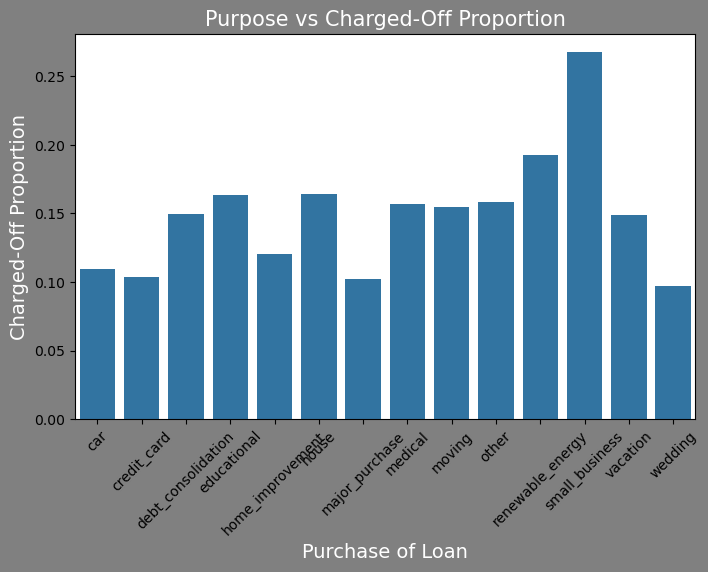

In [134]:
fig, ax1 = plt.subplots(figsize=(8,5),facecolor='grey')
ax1.set_title('Purpose vs Charged-Off Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='purpose', y='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_xlabel('Purchase of Loan',fontsize=14,color='w')
ax1.set_ylabel('Charged-Off Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

### 1. Those applicants who is having home loan is having low chances of loan defaults.
### 2. Those applicants having loan for small bussiness is having high chances for loan defaults.

In [136]:
#Bivariate Analysis on DTI against Chargedoff_Proportion -

dti_vs_loan = loan_df.groupby(['dti_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan['Total'] = dti_vs_loan['Charged Off']+ dti_vs_loan['Fully Paid']
dti_vs_loan['Chargedoff_Proportion'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']
dti_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,dti_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1044,5387,6431,0.162339
0,High,948,5111,6059,0.156461
2,Moderate,985,5785,6770,0.145495
1,Low,789,5339,6128,0.128753
4,Very Low,948,6855,7803,0.121492


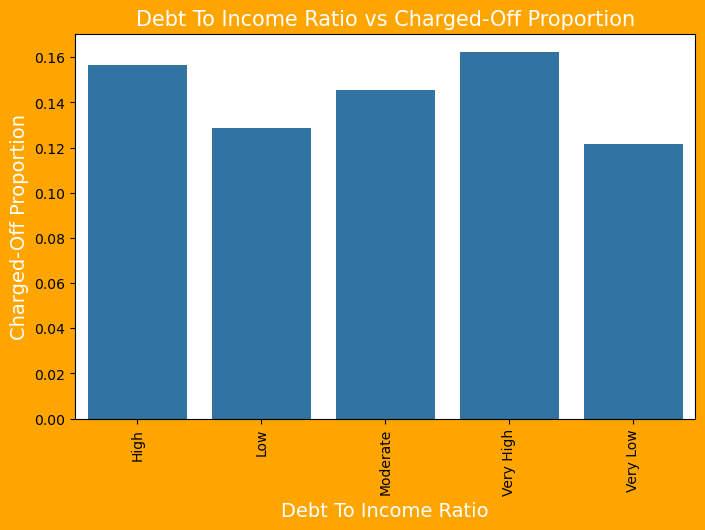

In [137]:
fig, ax1 = plt.subplots(figsize=(8,5),facecolor='orange')
ax1.set_title('Debt To Income Ratio vs Charged-Off Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='dti_b', y='Chargedoff_Proportion', data=dti_vs_loan)
ax1.set_xlabel('Debt To Income Ratio',fontsize=14,color='w')
ax1.set_ylabel('Charged-Off Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=90)
plt.show()

### Observation:
#### 1.High DTI value  having high risk of defaults
#### 2 Lower the DTO having low chances loan defaults.

In [139]:
loan_df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    31741
1.0     1445
2.0        5
Name: count, dtype: int64

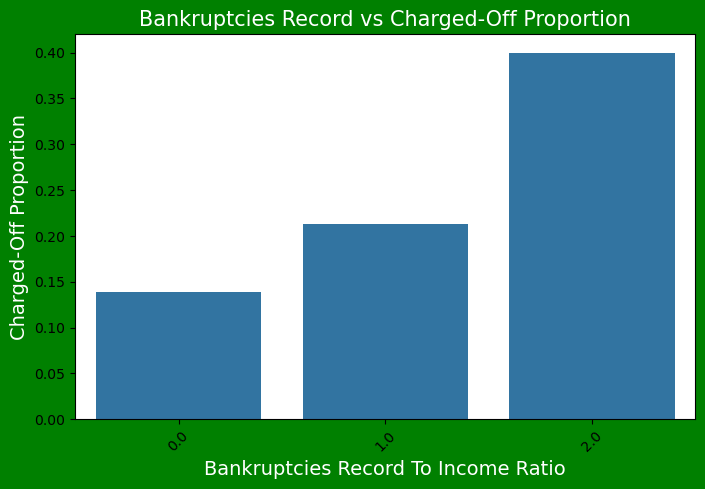

In [140]:
# #Bivariate Analysis on Bankruptcies Record against Chargedoff_Proportion -
pub_rec_bankruptcies_vs_loan = loan_df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_vs_loan['Total'] = pub_rec_bankruptcies_vs_loan['Charged Off']+ pub_rec_bankruptcies_vs_loan['Fully Paid']
pub_rec_bankruptcies_vs_loan['Chargedoff_Proportion'] = pub_rec_bankruptcies_vs_loan['Charged Off'] / pub_rec_bankruptcies_vs_loan['Total']
pub_rec_bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plt.subplots(figsize=(8,5),facecolor='green')
ax1.set_title('Bankruptcies Record vs Charged-Off Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=pub_rec_bankruptcies_vs_loan)
ax1.set_xlabel('Bankruptcies Record To Income Ratio',fontsize=14,color='w')
ax1.set_ylabel('Charged-Off Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

### Observations:
#### 1.Bankruptcies Record with 2 is having high impact on loan defaults
#### 2.Bankruptcies Record with 0 is low impact on loan defaults
#### 3.Lower the Bankruptcies lower the risk.

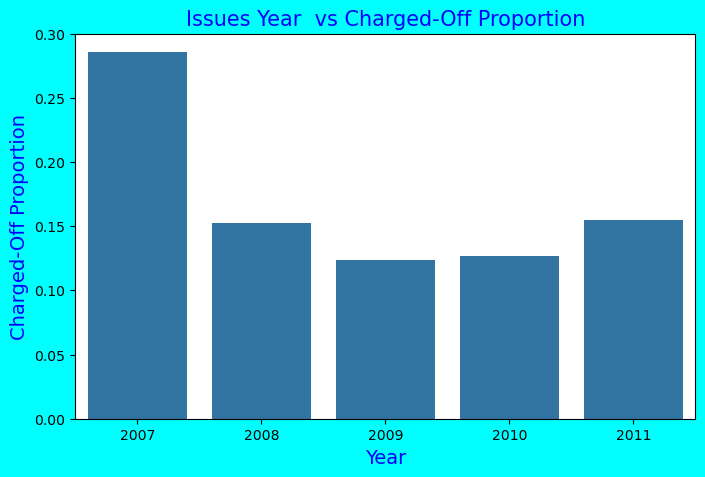

In [142]:
# #Bivariate Analysis on Issues of Year  against Chargedoff_Proportion -

issue_year_vs_loan = loan_df.groupby(['issue_year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_year_vs_loan['Total'] = issue_year_vs_loan['Charged Off']+ issue_year_vs_loan['Fully Paid']
issue_year_vs_loan['Chargedoff_Proportion'] = issue_year_vs_loan['Charged Off'] / issue_year_vs_loan['Total']
issue_year_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plt.subplots(figsize=(8,5),facecolor='aqua')
ax1.set_title('Issues Year  vs Charged-Off Proportion',fontsize=15,color='b')
ax1=sea.barplot(x='issue_year', y='Chargedoff_Proportion', data=issue_year_vs_loan)
ax1.set_xlabel('Year',fontsize=14,color='b')
ax1.set_ylabel('Charged-Off Proportion',fontsize=14,color = 'b')
plt.show()

In [143]:
    # Year 2007 is highest loan defaults.
    # 2009 is having lowest loan defaults.


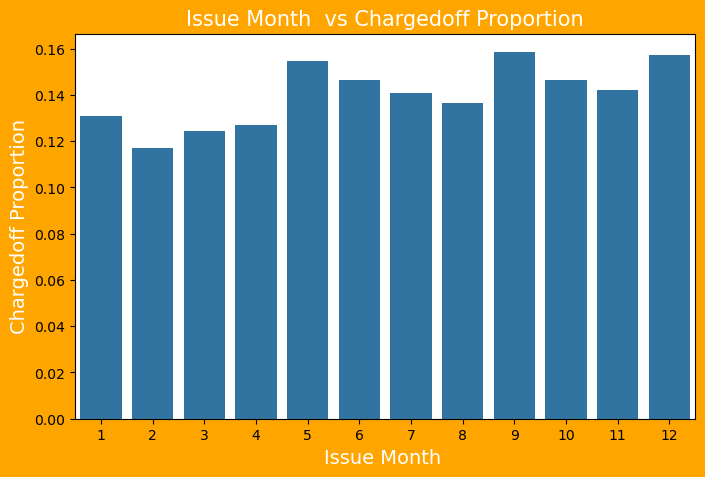

In [144]:
# #Bivariate Analysis on Month of Issue of loan Record against Chargedoff_Proportion -

issue_month_vs_loan = loan_df.groupby(['issue_month', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_month_vs_loan['Total'] = issue_month_vs_loan['Charged Off']+ issue_month_vs_loan['Fully Paid']
issue_month_vs_loan['Chargedoff_Proportion'] = issue_month_vs_loan['Charged Off'] / issue_month_vs_loan['Total']
issue_month_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plt.subplots(figsize=(8,5),facecolor='orange')
ax1.set_title('Issue Month  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='issue_month', y='Chargedoff_Proportion', data=issue_month_vs_loan)
ax1.set_xlabel('Issue Month ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

In [145]:
# 1. Those loan has been issued in May, September and december is having high number of loan defaults
# 2. Those loan has been issued in month of February is having high number of loan defaults
#3. Majority of loan defaults comig from applicants whose loan has been aprroved from September-to Deceber

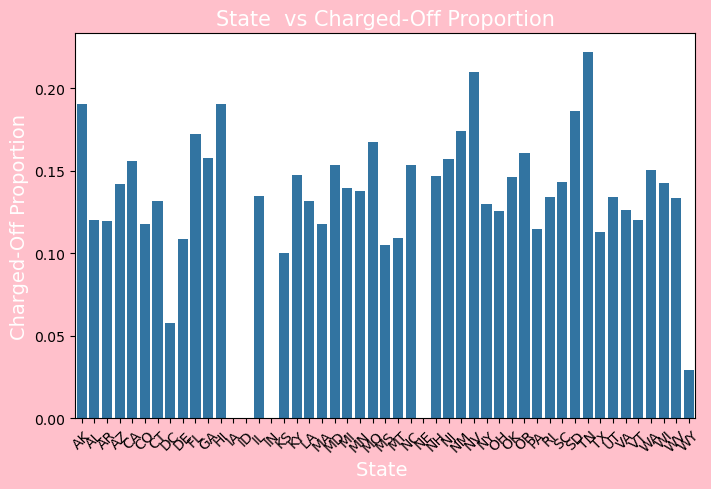

In [146]:
# #Bivariate Analysis on Address state  against Chargedoff_Proportion -

addr_state_vs_loan = loan_df.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan['Total'] = addr_state_vs_loan['Charged Off']+ addr_state_vs_loan['Fully Paid']
addr_state_vs_loan['Chargedoff_Proportion'] = addr_state_vs_loan['Charged Off'] / addr_state_vs_loan['Total']
addr_state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# graph
fig, ax1 = plt.subplots(figsize=(8,5),facecolor='pink')
ax1.set_title('State  vs Charged-Off Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='addr_state', y='Chargedoff_Proportion', data=addr_state_vs_loan)
ax1.set_xlabel('State ',fontsize=14,color='w')
ax1.set_ylabel('Charged-Off Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

### Observations:
#### 1.DE States is holding highest number of loan defaults.
#### 2.CA is having low number of loan defaults

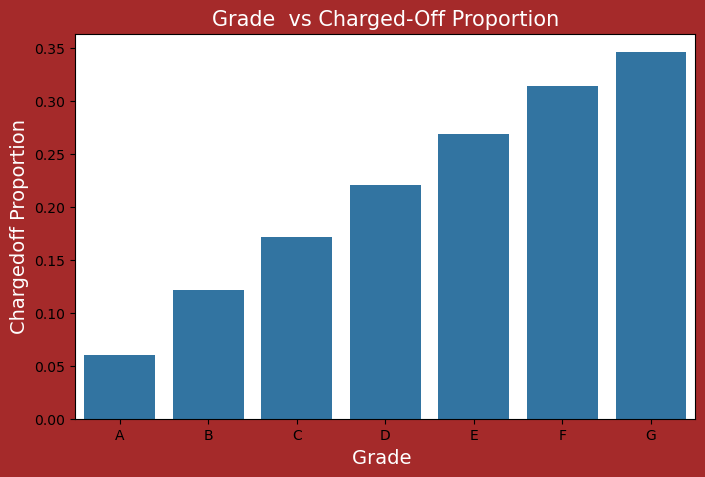

In [148]:
# #Bivariate Analysis on Grade against Chargedoff_Proportion -

grade_vs_loan = loan_df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off']+ grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plt.subplots(figsize=(8,5),facecolor='brown')
ax1.set_title('Grade  vs Charged-Off Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grade ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

  observations :
  1. The Loan applicants with loan Grade G is having higest Loan Defaults.
   2. The Loan applicants with loan A is having lowest Loan Defaults.

## 7.  Correlation Analysis

In [151]:
corr_loan = loan_df
corr_loan.head(1)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month,loan_amnt_b,annual_inc_b,int_rate_b,dti_b
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0,2011,12,0 - 5K,0 - 40k,Low,Very High


In [152]:
corr = corr_loan.corr
corr

<bound method DataFrame.corr of             id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0      1077501     5000.0       5000.0           4975.0    36     10.65   
1      1077430     2500.0       2500.0           2500.0    60     15.27   
2      1077175     2400.0       2400.0           2400.0    36     15.96   
3      1076863    10000.0      10000.0          10000.0    36     13.49   
5      1075269     5000.0       5000.0           5000.0    36      7.90   
...        ...        ...          ...              ...   ...       ...   
39562   154154     4800.0       4800.0           1100.0    36     10.28   
39573   150940     7000.0       7000.0           1000.0    36     10.59   
39623   132892     9000.0       9000.0            700.0    36     12.49   
39666   119043    15450.0      15450.0            600.0    36     11.22   
39680   112496     3000.0       3000.0            525.0    36     11.86   

       installment grade emp_length home_ownership  annual_inc  \
0

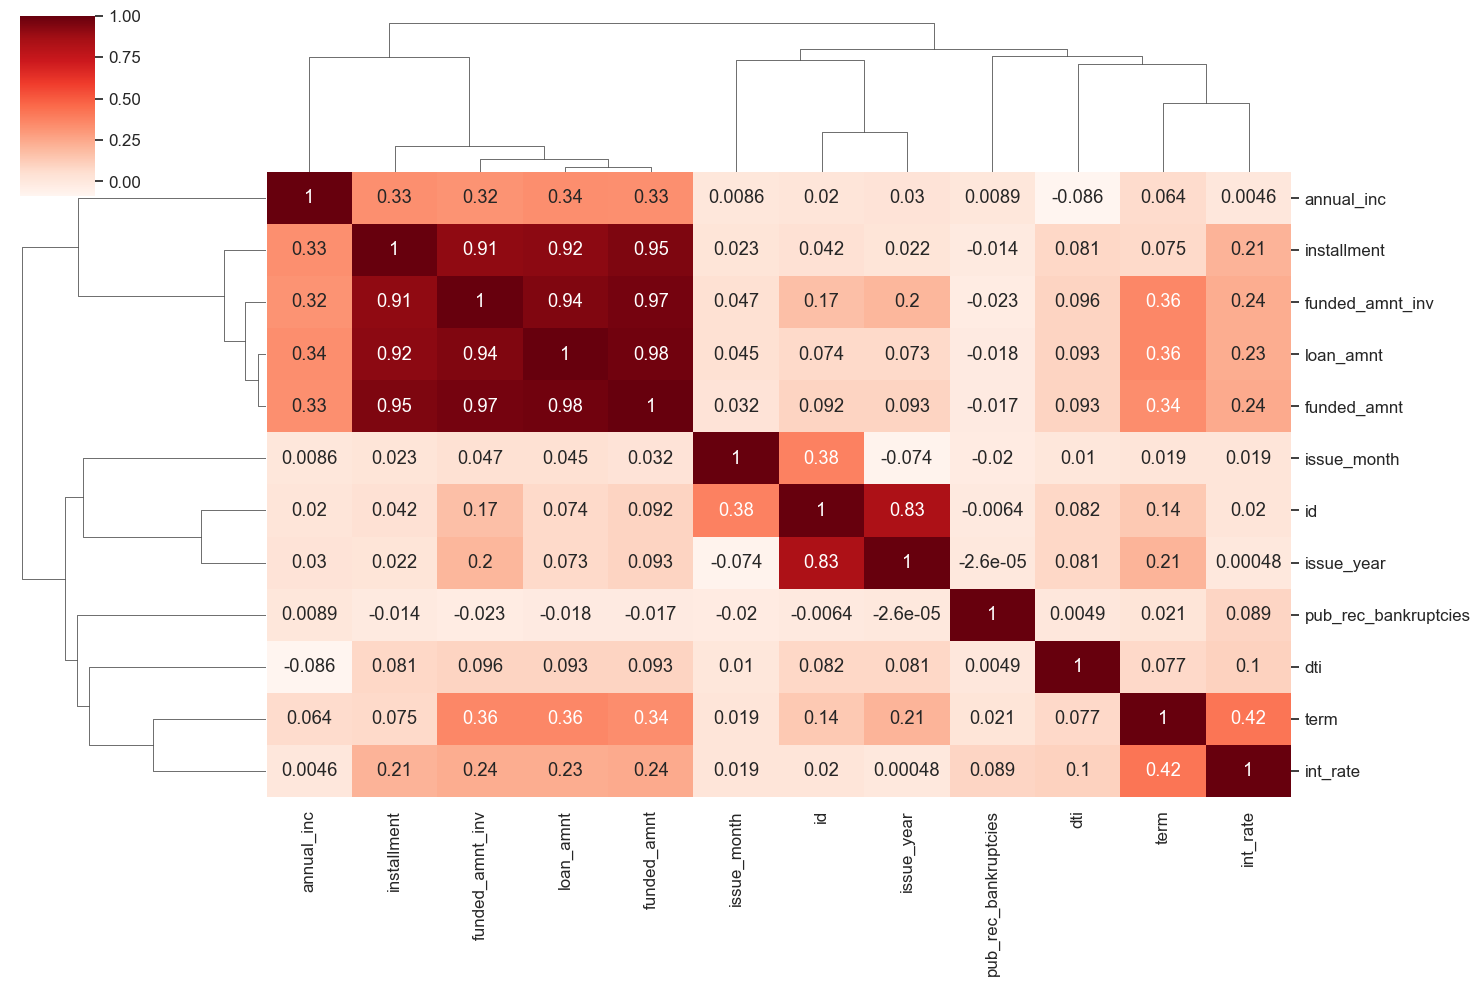

In [153]:
corr_loan = loan_df.select_dtypes(include=[float,int])
corr = corr_loan.corr()
sea.set(font_scale=1.1)
sea.clustermap(corr, annot=True, figsize=(15,10), cmap="Reds")
plt.show()


In [154]:
drop_columns = ['installment', 'id', 'issue_year', 'issue_month']
corr_loan = corr_loan.drop(columns=drop_columns)

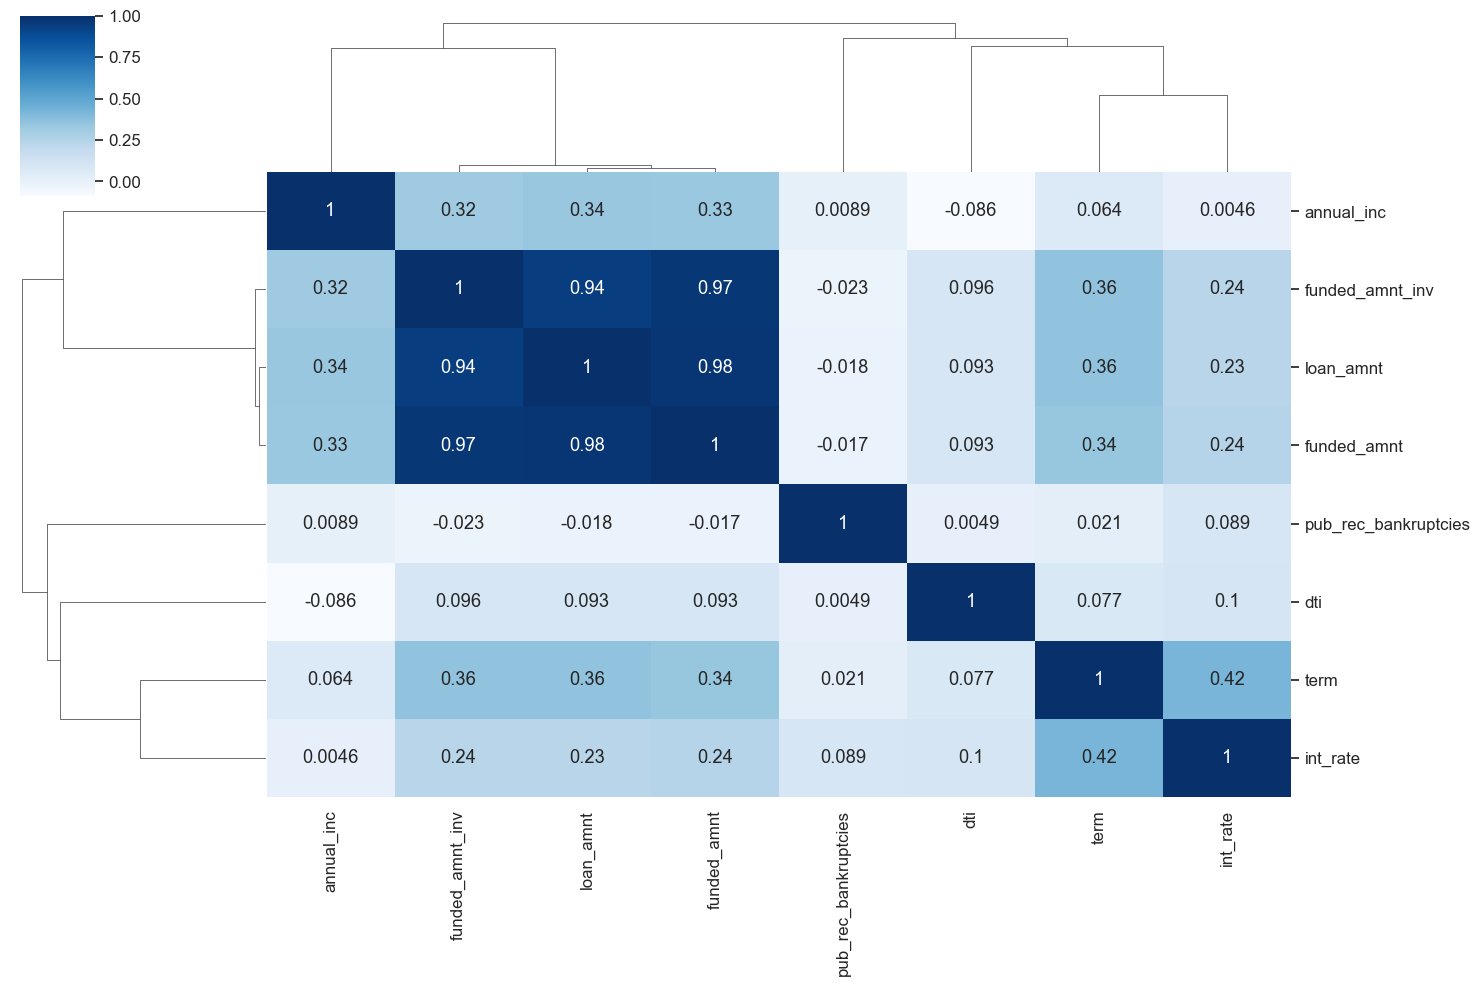

In [155]:
corr = corr_loan.corr()
sea.set(font_scale=1.1)
sea.clustermap(corr, annot=True, figsize=(15, 10), cmap="Blues")
plt.show()

Negative Correlation:

1.loan_amnt has negative correlation with pub_rec_bankrupticies

2.annual income has a negative correlation with dti

Strong Correlation:

1.term has a strong correlation with loan amount

2.term has a strong correlation with interest rate

3.annual income has a strong correlation with loan_amount

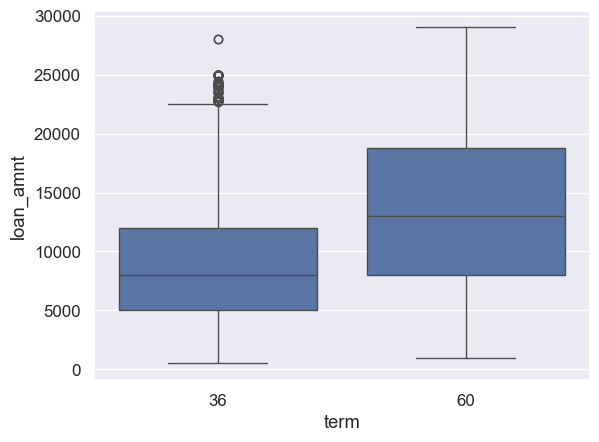

In [157]:
sea.boxplot(x = 'term', y = 'loan_amnt', data=corr_loan)
plt.show()

from the above graph we can see that if term is increasing loan amount is also increasing

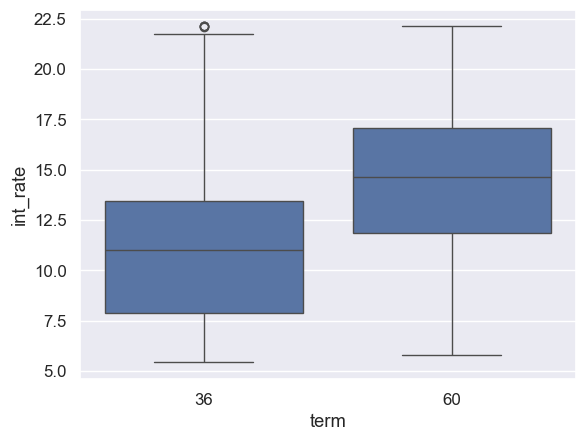

In [159]:
sea.boxplot(x = 'term', y = 'int_rate', data=corr_loan)
plt.show()